Enter type of data:
       1:ushape
       2:concentric
       3:linear
       4:xor
       5:spiral
       6:random
       7:outlier
       8:overlap
       4
Enter number of neurons in 1st hidden layer:5
Enter number of neurons in 2nd hidden layer:5
Enter number of neurons in output layer:1
Enter activation function in 1st hidden layer:relu
Enter activation function in 2nd hidden layer:relu
Enter activation function in output layer:sigmoid
Enter number of epochs:1500
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 132s 14ms/step


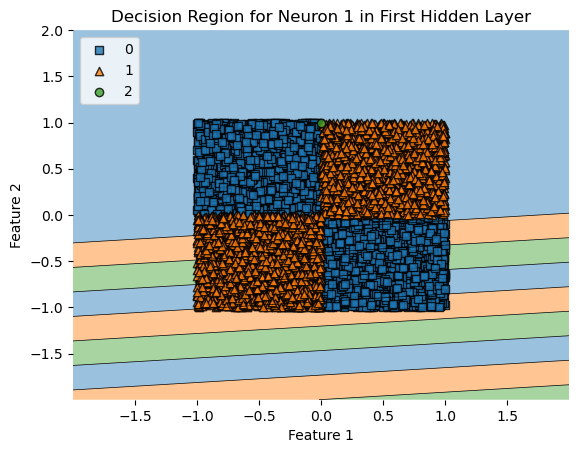

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


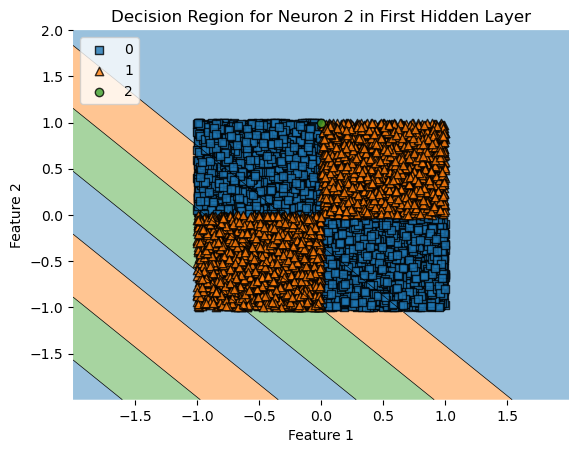

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


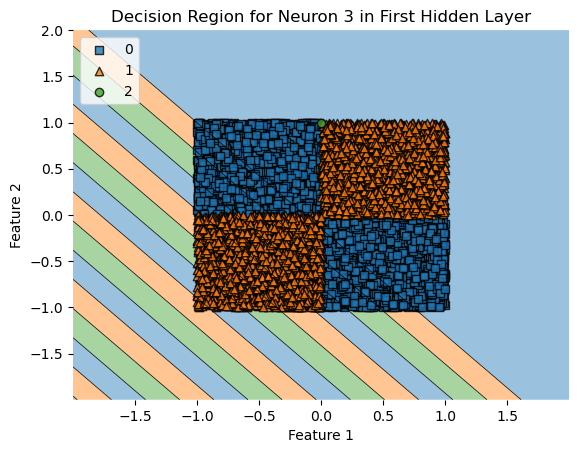

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


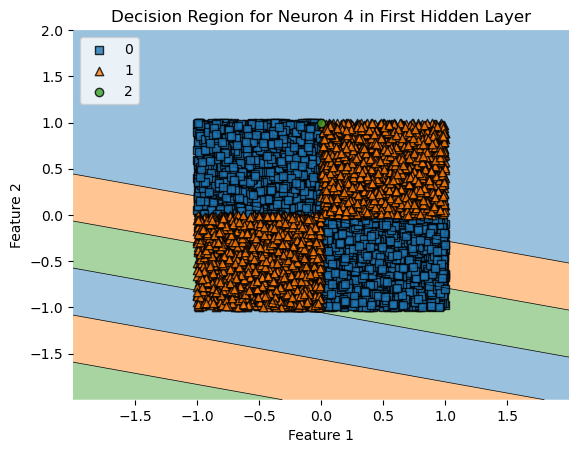

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


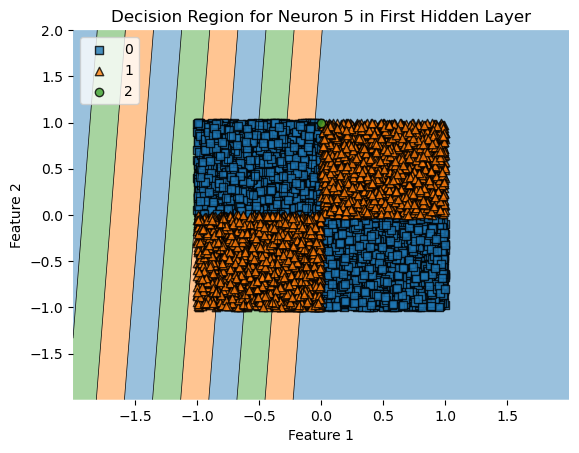

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


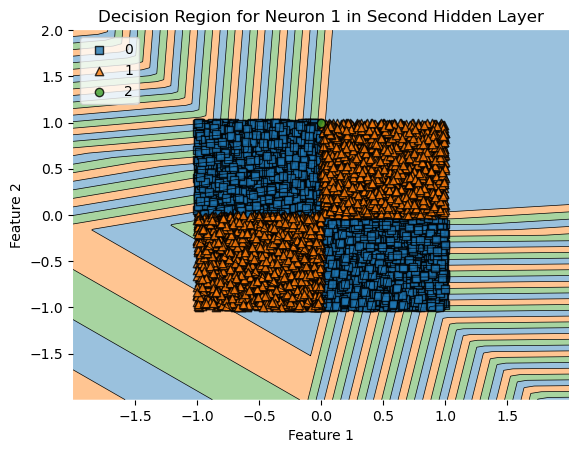

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


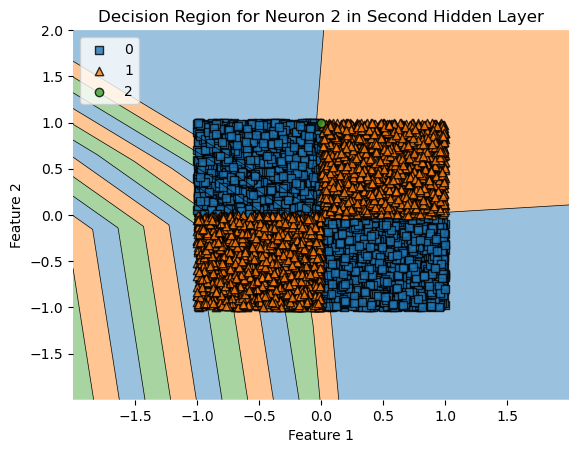

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step


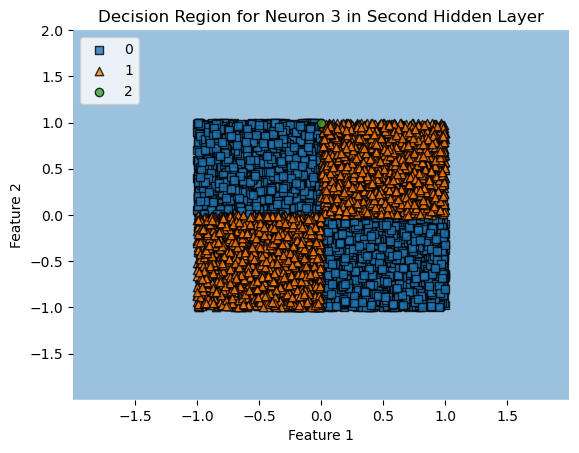

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step


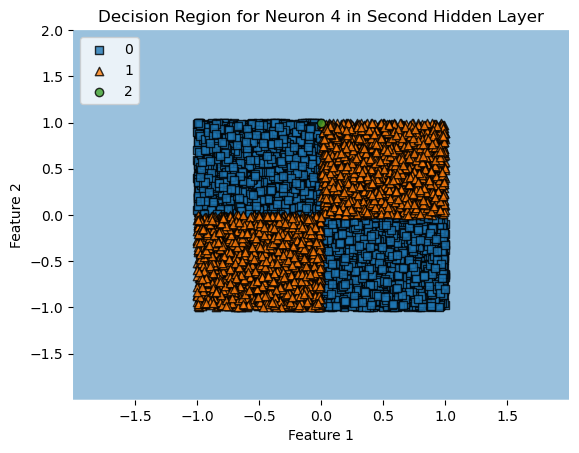

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step


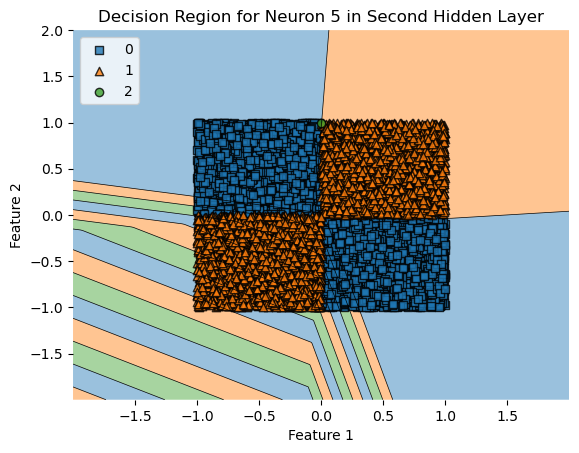

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step


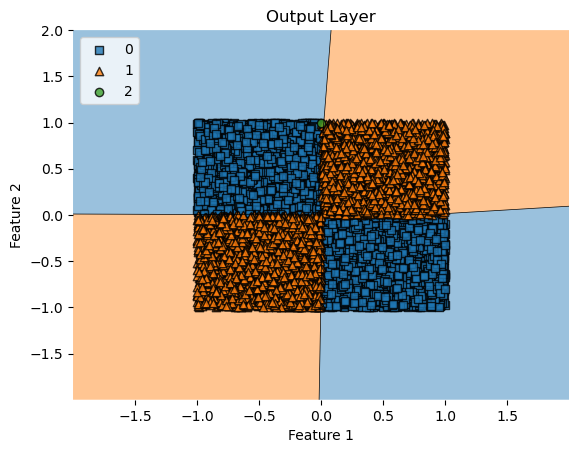

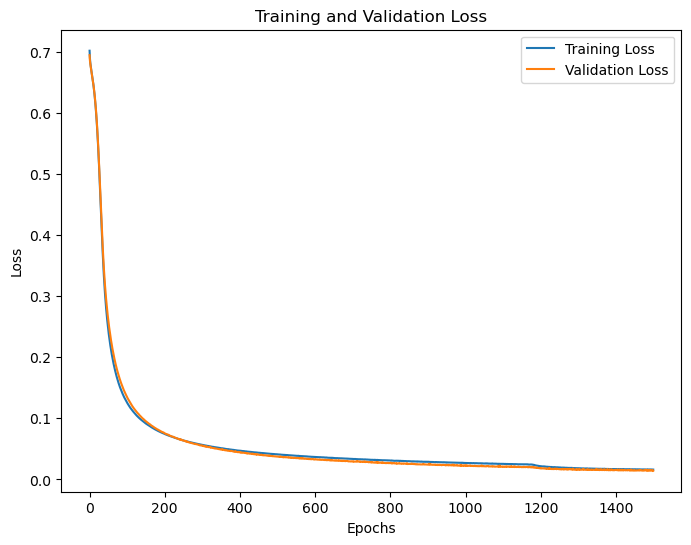

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions

ushape = r"C:\Users\ravinder\Desktop\DL\multiple_csv\u_shape_generated_points.csv"
concentric = r"C:\Users\ravinder\Desktop\DL\multiple_csv\concentric_generated_points.csv"
linear = r"C:\Users\ravinder\Desktop\DL\multiple_csv\linear_generated_points.csv"
xor = r"C:\Users\ravinder\Desktop\DL\multiple_csv\xor_generated_points.csv"
spiral=r"C:\Users\ravinder\Desktop\DL\multiple_csv\two_spirals_generated_points.csv"
random=r"C:\Users\ravinder\Desktop\DL\multiple_csv\random_generated_points.csv"
outlier=r"C:\Users\ravinder\Desktop\DL\multiple_csv\linear_outlier_generated_points.csv"
overlap=r"C:\Users\ravinder\Desktop\DL\multiple_csv\linear_overlap_generated_points.csv"



def data(filepath, input_features, hl_1, hl_2, ol, af_1, af_2, ol_3, e):
    df = pd.read_csv(filepath, header=None)
    x = df.drop(2, axis=1).values
    y = df[2].values.astype(int)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    input_layer = Input(shape=(input_features,))
    hidden_layer1 = Dense(hl_1, activation=af_1)(input_layer)
    hidden_layer2 = Dense(hl_2, activation=af_2)(hidden_layer1)
    output_layer = Dense(1, activation=ol_3)(hidden_layer2)
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=e, batch_size=100, validation_split=0.2, verbose=0)
    
    return model, x, y, history

def plot_decision_region_for_neuron(x, y, model, title):
    plot_decision_regions(x, y, clf=model, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()

def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

data_choice = int(input("""Enter type of data:
       1:ushape
       2:concentric
       3:linear
       4:xor
       5:spiral
       6:random
       7:outlier
       8:overlap
       """))

input_features = 2
hl_1 = int(input("Enter number of neurons in 1st hidden layer:"))
hl_2 = int(input("Enter number of neurons in 2nd hidden layer:"))
ol = int(input("Enter number of neurons in output layer:"))
af_1 = input("Enter activation function in 1st hidden layer:")
af_2 = input("Enter activation function in 2nd hidden layer:")
ol_3 = input("Enter activation function in output layer:")
e = int(input("Enter number of epochs:"))

filepaths = {1: ushape, 2: concentric, 3: linear, 4: xor, 5:spiral,6:random,7:outlier,8:overlap}
selected_filepath = filepaths[data_choice]

m, x, y, history = data(selected_filepath, input_features, hl_1, hl_2, ol, af_1, af_2, ol_3, e)

for j in range(hl_1):
    intermediate_layer_model = Model(inputs=m.input, outputs=m.layers[1].output[:, j])
    plot_decision_region_for_neuron(x, y, intermediate_layer_model, f'Decision Region for Neuron {j+1} in First Hidden Layer')

for j in range(hl_2):
    intermediate_layer_model = Model(inputs=m.input, outputs=m.layers[2].output[:, j])
    plot_decision_region_for_neuron(x, y, intermediate_layer_model, f'Decision Region for Neuron {j+1} in Second Hidden Layer')

output_layer_model = Model(inputs=m.input, outputs=m.layers[-1].output)
plot_decision_region_for_neuron(x, y, output_layer_model, "Output Layer")

plot_history(history)

# Print the history
# print("Training and Validation Loss History:")
# for epoch in range(e):
#     print(f"Epoch {epoch+1}: Training Loss = {history.history['loss'][epoch]}, Validation Loss = {history.history['val_loss'][epoch]}")


# streamlit

In [ ]:
import streamlit as st
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

def load_data(filepath):
    df = pd.read_csv(filepath, header=None)
    x = df.drop(2, axis=1).values
    y = df[2].values.astype(int)
    return x, y

def build_model(input_features, hl_1, hl_2, ol, af_1, af_2, ol_3):
    input_layer = Input(shape=(input_features,))
    hidden_layer1 = Dense(hl_1, activation=af_1)(input_layer)
    hidden_layer2 = Dense(hl_2, activation=af_2)(hidden_layer1)
    output_layer = Dense(ol, activation=ol_3)(hidden_layer2)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

def train_model(model, X_train, y_train, epochs):
    model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=100, validation_split=0.2, verbose=0)
    return history

def plot_decision_region_for_neuron(x, y, model, title):
    plot_decision_regions(x, y, clf=model, legend=2)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    st.pyplot(plt.gcf())
    plt.clf()

def plot_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    st.pyplot(plt.gcf())
    plt.clf()

def main():
    st.title("Neural Network Decision Boundary Visualization")

    data_choice = st.sidebar.selectbox("Select Data Type", 
                                       ["ushape", "concentric", "linear", "xor", "spiral", "random", "outlier", "overlap"])

    filepath_dict = {
        "ushape": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\u_shape_generated_points.csv",
        "concentric": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\concentric_generated_points.csv",
        "linear": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\linear_generated_points.csv",
        "xor": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\xor_generated_points.csv",
        "spiral": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\two_spirals_generated_points.csv",
        "random": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\random_generated_points.csv",
        "outlier": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\linear_outlier_generated_points.csv",
        "overlap": "C:\\Users\\ravinder\\Desktop\\DL\\multiple_csv\\linear_overlap_generated_points.csv"
    }
    
    selected_filepath = filepath_dict[data_choice]
    x, y = load_data(selected_filepath)
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    st.sidebar.header("Neural Network Parameters")
    input_features = 2
    hl_1 = st.sidebar.number_input("Neurons in 1st Hidden Layer", min_value=1, max_value=100, value=10)
    hl_2 = st.sidebar.number_input("Neurons in 2nd Hidden Layer", min_value=1, max_value=100, value=10)
    ol = 1
    af_1 = st.sidebar.text_input("Activation Function in 1st Hidden Layer", value="relu")
    af_2 = st.sidebar.text_input("Activation Function in 2nd Hidden Layer", value="relu")
    ol_3 = st.sidebar.text_input("Activation Function in Output Layer", value="sigmoid")
    epochs = st.sidebar.number_input("Number of Epochs", min_value=1, max_value=1000, value=100)

    if st.sidebar.button("Train Model"):
        model = build_model(input_features, hl_1, hl_2, ol, af_1, af_2, ol_3)
        history = train_model(model, X_train, y_train, epochs)
        st.sidebar.success("Model Trained Successfully!")

        for j in range(hl_1):
            intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[1].output[:, j])
            plot_decision_region_for_neuron(x, y, intermediate_layer_model, f'Decision Region for Neuron {j+1} in First Hidden Layer')

        for j in range(hl_2):
            intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[2].output[:, j])
            plot_decision_region_for_neuron(x, y, intermediate_layer_model, f'Decision Region for Neuron {j+1} in Second Hidden Layer')

        output_layer_model = Model(inputs=model.input, outputs=model.layers[-1].output)
        plot_decision_region_for_neuron(x, y, output_layer_model, "Output Layer")

        plot_history(history)

if __name__ == "__main__":
    main()
